# Gaming Trends of Twitch

The goal of this project is to snalyse gaming trends with SQL and visualise them with Matplotlib and Seaborn. 

The project is broken down into two parts:
- Part 1: Analyse Gaming Data with SQL;
- Part 2: Visualise Gaming Data with Matplotlib and Seaborn.

Twitch.tv is the world's leading live streaming platform for gamers, with over 15 million daily active users. Using data to understand its users and products is one of the main responsibilities of the Twitch Science Team. So in the Data Science Path Cumulative Project, codecademy has partnered with the Twitch Science Team and was given a scrubbed dataset (800,000 rows) that describe user engagmeent with Twitch stream and Twitch chat on January 1st, 2015.


The `stream.csv` has the following fields:

- `time`: date and time (YYYY-MM-DD HH:MM:SS);
- `device_id`; device ID;
- `login`: login ID;
- `channel`: streamer name;
- `country`: country name abbreviation;
- `player`:	streamed device;
- `game`: game name
- `stream_format`: stream quality;
- `subscriber`:	is the viewer a subscriber? (true/false).


The `chat.csv` has the following fields:

- `time`: date and time (YYYY-MM-DD HH:MM:SS);
- `device_id`: device ID;
- `login`: login ID;
- `channel`: streamer name;
- `country`: country name abbreviation;
- `player`:	chat device;
- `game`: game name.

### Investigate

We will start by getting a feel for the `stream` dataset and the `chat` dataset via SQL. 
To do that we should:
- import necessary tools;
- create an SQL database;
- upload csv files to variables, creating pandas DataFrames out of them;
- and finally, write records of these DataFrames to new tables in the database. 

In [19]:
# Import tools
import pandas
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np 

# Create new db
conn = sqlite3.connect('./twitch.db')

# Read csv to DataFrame
chat_df = pandas.read_csv('./chat.csv')
# Create new table for chats in db
chat_df.to_sql('chat', conn, if_exists='replace', index=False)

# Read csv to DataFrame
stream_df = pandas.read_csv('./stream.csv')
# Create new table for streams in db
stream_df.to_sql('stream', conn, if_exists='replace', index=False)

curs = conn.cursor()

In [2]:
def sql(*args, **kwargs):
    v = curs.execute(*args, **kwargs)
    return pandas.DataFrame(v.fetchall(), columns=[column_name[0] for column_name in v.description])

In [3]:
sql('''
select * 
from chat
limit 5
''')

,time,device_id,login,channel,country,player,game
0,2015-01-01 18:45:50,70e2b95b5ac0d4c227e46966658d16b3e044996e,5c2f5c1f19a7738e16ed0be551d865e8a8fce71d,jerry,BY,None,Dota 2
1,2015-01-01 01:16:57,f2b9065b55fd80d6aa653ce989b489f4ec5198be,0d77740e4fb5ce77d94f9f6c8ef1f762990d0344,elaine,HK,None,Devil May Cry 4: Special Edition
2,2015-01-01 16:22:10,d448ba963d7e1023dd1b0a40b95d4f6611750692,77ab14c1fb815e1c369ba0cf7d4c56b4fe489997,frank,GB,iphone_t,League of Legends
3,2015-01-01 03:58:13,8d6823dc52b400b50aebf269bf1f03a36d19eeaa,91cb88c0743761589273fc5e800e7743ece46494,frank,US,iphone_t,League of Legends
4,2015-01-01 11:47:35,16c1e39594d62358d27ae604ad43a071f0d86bc4,51a9234f83d656607cfd7f26690c12d2ffbce353,estelle,DE,None,Dota 2


In [4]:
sql('''
select *
from stream
limit 5
''')

,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,None,NaN
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0.0
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,0.0
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,0.0
4,2015-01-01 11:28:19,e3288ca5e3153aa85e32f64cdd994b7666968dcf,b920c228acbcbebee26d9c79f6eb73b73a9480c7,morty,FR,site,Heroes of the Storm,medium,0.0


What are the unique games in the stream table?

In [5]:
sql('''
    select distinct game
    from stream
''')

,game
0,League of Legends
1,DayZ
2,Dota 2
3,Heroes of the Storm
4,Counter-Strike: Global Offensive
5,Hearthstone: Heroes of Warcraft
6,The Binding of Isaac: Rebirth
7,Agar.io
8,Gaming Talk Shows
9,None


### Aggregate Functions

Now we are going to apply different kinds of aggregations and other actions to pull out necessary data. 
First out question is what are the most popular games in the stream table? We are going to find it by counting number of viewers. 

In [6]:
most_popular = sql('''
    select game, count(*)
        as "viewers_count"
    from stream
    group by 1
    order by 2 desc
''')

Most viewers watch League of Legends streams (also known as LoL). Let's find where are these LoL stream viewers located?

In [8]:
whereabouts = sql('''
    select country, count(*)
        as 'viewers_count'
    from stream
    where game = 'League of Legends'
    group by 1
    order by 2 desc
    limit 20
''')

The player column contains the source the user is using to view the stream (site, iphone, android, etc). Let's find out how many users have every streaming source. 

In [ ]:
sql('''
    select player, count(*)
        as 'user_count'
    from stream
    group by 1
    order by 2 desc
''')

,player,user_count
0,site,246115
1,iphone_t,100689
2,android,93508
3,ipad_t,53646
4,embed,19819
5,xbox_one,4863
6,home,3479
7,frontpage,1567
8,amazon,1155
9,xbox360,985


There is an codecademy assignment to add genres of the games with the following logic: 

- If League of Legends → MOBA
- If Dota 2 → MOBA
- If Heroes of the Storm → MOBA
- If Counter-Strike: Global Offensive → FPS
- If DayZ → Survival
- If ARK: Survival Evolved → Survival
- Else → Other


In [ ]:
sql('''
    select game,
        case 
            when game = 'League of Legends'
                then 'MOBA'
            when game = 'Dota 2'
                then 'MOBA'
            when game = 'Heroes of the Storm'
                then 'MOBA'
            when game = 'Counter-Strike: Global Offensive'
                then 'FPS'
            when game = 'DayZ'
                then 'Survival'
            when game = 'ARK: Survival Evolved'
                then 'Survival'
        else 'Other'
        end as 'genre',
    count(*)
        as 'viewers_count'
    from stream
    group by 1
    order by 3 desc
''')

,game,genre,viewers_count
0,League of Legends,MOBA,193533
1,Dota 2,MOBA,85608
2,Counter-Strike: Global Offensive,FPS,54438
3,DayZ,Survival,38004
4,Heroes of the Storm,MOBA,35310
5,The Binding of Isaac: Rebirth,Other,29467
6,Gaming Talk Shows,Other,28115
7,World of Tanks,Other,15932
8,Hearthstone: Heroes of Warcraft,Other,14399
9,Agar.io,Other,11480


How does view count change in the course of a day?

In [ ]:
sql('''
    select strftime('%H', time)
        as 'hour_of_day', 
    count(*)
        as 'views_count'
    from stream
    group by 1
    order by 2 desc
''')

,hour_of_day,views_count
0,12,50261
1,13,43390
2,11,33645
3,20,29816
4,21,29399
5,18,28863
6,19,28374
7,17,28350
8,15,26707
9,14,26219


Result: peak hours is 12PM and least busy is 6 AM.
What about user activity in Sweden, where I live? 

In [ ]:
sql('''
    select strftime('%H', time)
        as 'hour_of_day', 
    count(*)
        as 'views_count'
    from stream
    where country = 'SE'
    group by 1
    order by 2 desc
''')

,hour_of_day,views_count
0,12,2192
1,13,1918
2,11,1188
3,14,1153
4,15,922
5,16,613
6,17,570
7,02,543
8,18,491
9,03,453


Result: peak hours the same 12PM and least busy is almost the same - 7 AM.

Now let's find out how many people in different countries watch a game I played recently: 'The Witcher 3: Wild Hunt'.

In [ ]:
sql('''
    select country, count(*)
    from stream
    where game = 'The Witcher 3: Wild Hunt'
    group by 1
    order by 2 desc
''')

,country,count(*)
0,US,31
1,AU,4
2,CA,3
3,TW,2
4,DK,2
5,TR,1
6,GB,1
7,FI,1


### Conclusion
- `"League of Legends"` is the game with the most number of views. In the US alone it is watched by almost `86 th.` people.  
- Most users whatch streams on the `twitch.com`.
- Peak hour for watching streams is `12 PM`, least busy is `6 AM` (in Sweden `7 AM`). 
- `"The Witcher 3: Wild Hunt"` is watched mostly by the US users. 


## Visualize Twitch Data

Now that we have conducted some analysis with SQL, we will be taking our findings from the SQL queries and visualize them using Matplotlib and Seaborn, in the forms of:

- Bar Graph: Featured Games
- Pie Chart: Stream Viewers’ Locations
- Line Graph: Time Series Analysis


### Bar Graph: Featured Games

We are going to take only those games that have more that 5000 viewers.


In [ ]:
most_popular_above_5000 = most_popular[most_popular['viewers_count'] > 5000]
most_popular_above_5000

,game,viewers_count
0,League of Legends,193533
1,Dota 2,85608
2,Counter-Strike: Global Offensive,54438
3,DayZ,38004
4,Heroes of the Storm,35310
5,The Binding of Isaac: Rebirth,29467
6,Gaming Talk Shows,28115
7,World of Tanks,15932
8,Hearthstone: Heroes of Warcraft,14399
9,Agar.io,11480


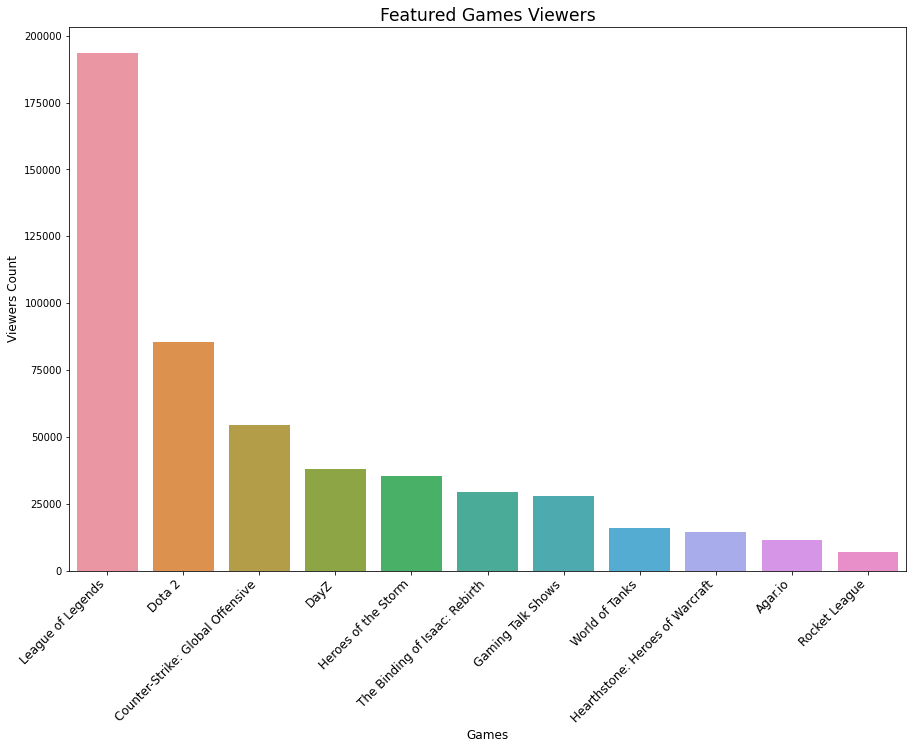

In [ ]:
# Draw barplot
plt.figure(figsize=(15, 10))
sns.barplot(data = most_popular_above_5000, x='game', y='viewers_count')

# Add descriptions
plt.title('Featured Games Viewers', fontsize = 'xx-large')

plt.xlabel('Games', fontsize = 'large')
plt.ylabel('Viewers Count', fontsize = 'large')

plt.xticks(
    horizontalalignment='right', 
    fontsize = 'large',
    rotation=45)

plt.show()

### Pie Chart: League of Legends Viewers' Whereabouts

There are 200 th. League of Legends viewers from this dataset. Where are they coming from?

In [28]:
whereabouts

,country,viewers_count
0,US,85606
1,CA,13034
2,DE,10835
3,None,7641
4,GB,6964
5,TR,4412
6,AU,3911
7,SE,3533
8,NL,3213
9,DK,2909


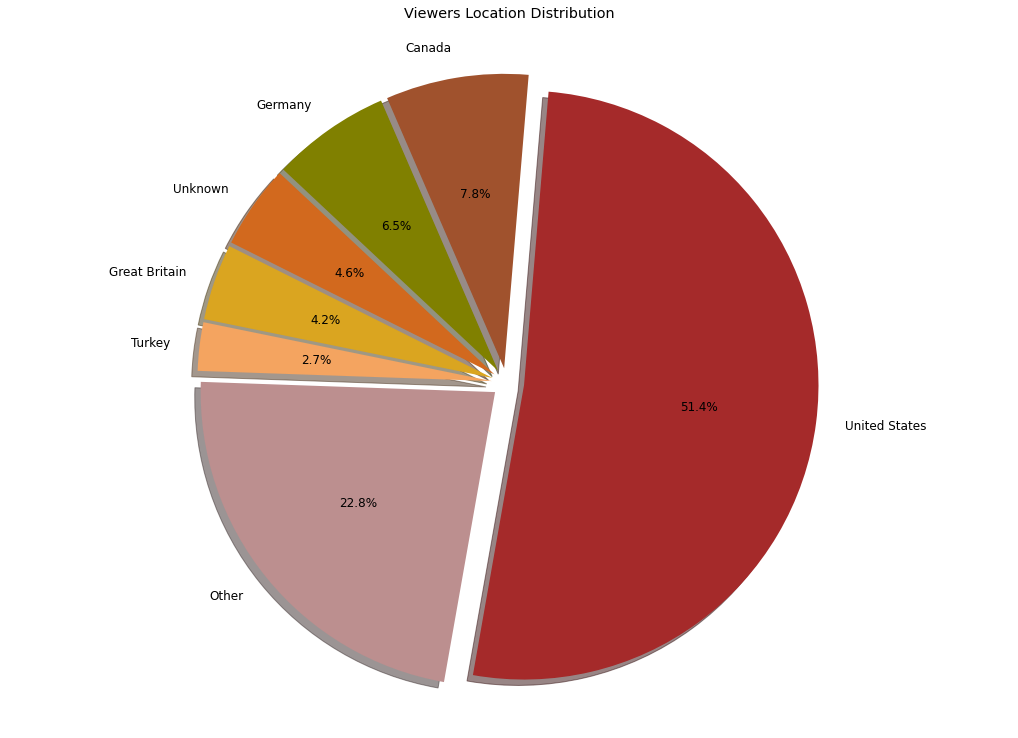

In [78]:
# Prepare figure
plt.figure(figsize = (18,13))

# Sum smaller values under status "Other"
other_value = whereabouts.viewers_count[6:].sum()
statuses = whereabouts.viewers_count[0:6]
statuses = np.append(statuses, other_value, axis=None)
statuses

# Draw pie chart
plt.pie(
    statuses, 
    labels=[
    'United States',
    'Canada',
    'Germany',
    'Unknown',
    'Great Britain',
    'Turkey',
    'Other'], 
    autopct='%0.1f%%', 
    textprops={'fontsize': 'large'},
    colors= ['Brown', 'Sienna', 'Olive', 'Chocolate', 'GoldenRod', 'SandyBrown', 'RosyBrown'],
    explode= (0.06, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05),
    shadow=True, 
    startangle=260)

plt.axis('equal')

# Add title
plt.title('Viewers Location Distribution', fontsize='x-large')

# Set margins
plt.margins(0.08)

plt.show()